In [ ]:
!pip install wfdb scipy


#Cargar datos

In [ ]:
 from google.colab import files

uploaded = files.upload()


Saving ecg_rr_features_curado.csv to ecg_rr_features_curado.csv


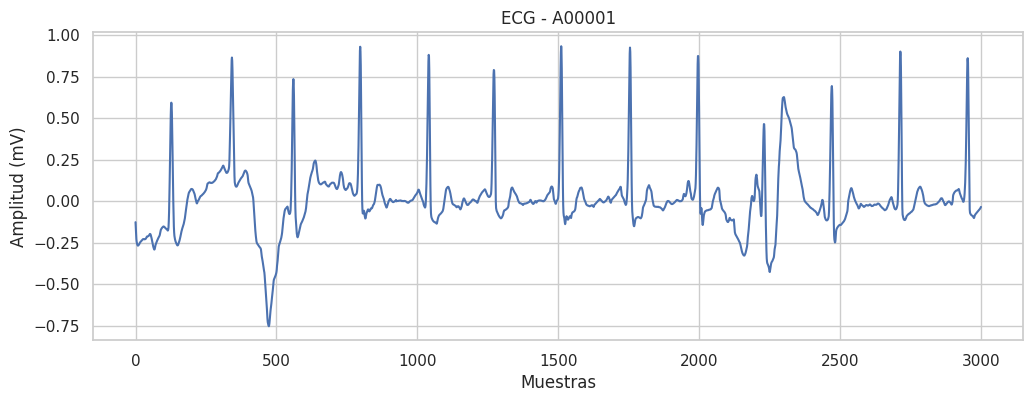

In [ ]:
import wfdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar y graficar una señal de ejemplo
record = wfdb.rdrecord('A00001')  # Ajusta el nombre según archivo subido
signal = record.p_signal

# Visualización de los primeros 10 segundos (asumiendo 300 Hz)
plt.figure(figsize=(12, 4))
plt.plot(signal[:3000])  # 300Hz * 10s
plt.title('ECG - A00001')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


##Resumen del artículo base
###Clifford et al., 2017 – PhysioNet Computing in Cardiology Challenge
El artículo presenta el PhysioNet Challenge 2017, cuyo objetivo fue desarrollar algoritmos automáticos para detectar fibrilación auricular (AFib) en señales ECG grabadas con dispositivos portátiles.

Tipo de datos: ECG de una sola derivación.

Duración variable: desde unos pocos segundos hasta más de un minuto.

**Etiquetas:**

*   N: Ritmo normal
*   A: Fibrilación auricular
*   O: Otro tipo de arritmia
*   ~: Señales ruidosas


El desafío impulsó avances en técnicas de clasificación usando redes neuronales, árboles de decisión y métodos de aprendizaje supervisado.

El conjunto de datos es realista para la aplicación clínica y representa un excelente entorno para entrenamiento de algoritmos de ML interpretables y eficientes.

In [ ]:
# Cargar etiquetas
df_ref = pd.read_csv("REFERENCE.csv", header=None, names=["id", "label"])

# Filtrar solo clases válidas ('N' y 'A')
df_ref = df_ref[df_ref['label'].isin(['N', 'A'])].reset_index(drop=True)

print(f"Número total de señales válidas: {len(df_ref)}")
print("\nDistribución de clases:")
print(df_ref['label'].value_counts())


Número total de señales válidas: 5788

Distribución de clases:
label
N    5050
A     738
Name: count, dtype: int64


#Inspección basica de los datos

In [ ]:
print("\nPrimeras filas del DataFrame:")
print(df_ref.head())

print("\nResumen estadístico:")
print(df_ref.describe(include='all'))

print("\nTipos de datos:")
print(df_ref.dtypes)



Primeras filas del DataFrame:
       id label
0  A00001     N
1  A00002     N
2  A00003     N
3  A00004     A
4  A00005     A

Resumen estadístico:
            id label
count     5788  5788
unique    5788     2
top     A08528     N
freq         1  5050

Tipos de datos:
id       object
label    object
dtype: object


#Función para mostrar señales

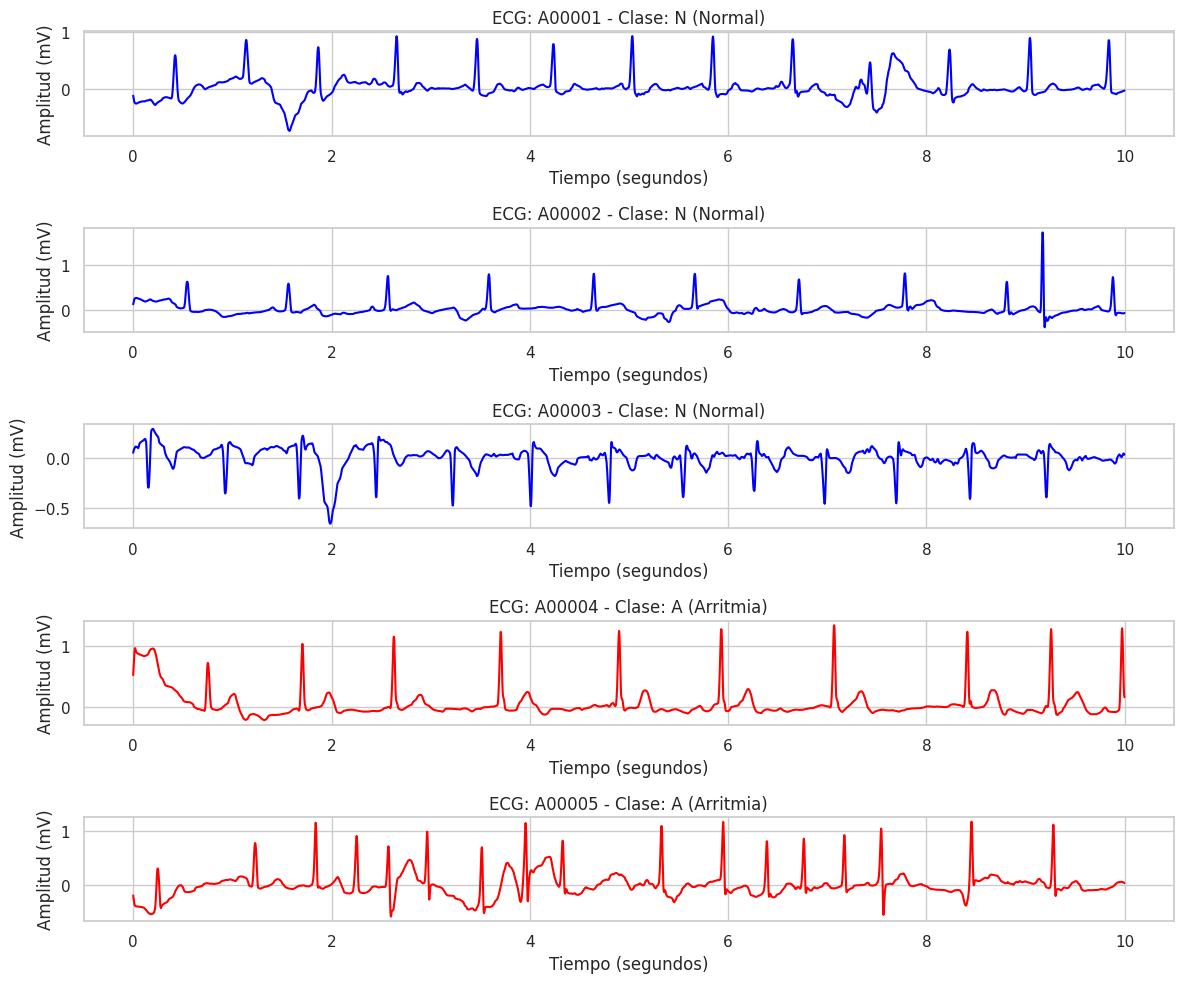

In [ ]:
def mostrar_varias_senales(df, num=5, fs=300):
    plt.figure(figsize=(12, 2 * num))
    for i, row in df.head(num).iterrows():
        record = wfdb.rdrecord(row['id'])
        signal = record.p_signal[:fs * 10].flatten()  # primeros 10 segundos
        tiempo = np.arange(len(signal)) / fs  # convertir a segundos

        plt.subplot(num, 1, i + 1)
        plt.plot(tiempo, signal, color='blue' if row['label'] == 'N' else 'red')
        plt.title(f"ECG: {row['id']} - Clase: {row['label']} ({'Normal' if row['label'] == 'N' else 'Arritmia'})")
        plt.xlabel("Tiempo (segundos)")
        plt.ylabel("Amplitud (mV)")
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Mostrar señales
mostrar_varias_senales(df_ref, num=5)

#Visualizacion de distribuciones

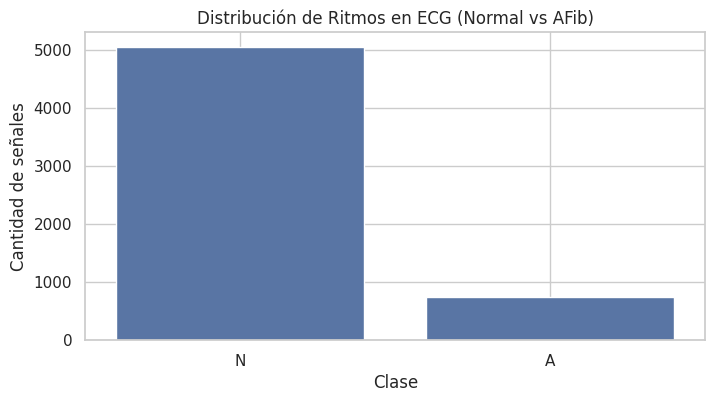

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.countplot(data=df_ref, x='label')
plt.title('Distribución de Ritmos en ECG (Normal vs AFib)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de señales')
plt.grid(True)
plt.show()

## Conclusiones

- Algunas variables como **rmssd** y **pnn50** muestran diferencias notables entre clases (por ejemplo, AFib tiende a tener valores mayores).
- La variable **mean_rr** también presenta una distribución distinta en pacientes con fibrilación auricular (ritmos más irregulares).
- Se observan **outliers** en algunas variables como `nn50`, lo cual podría reflejar la variabilidad extrema en ciertos casos.
- En general, el dataset está limpio, bien etiquetado, y permite ya desde esta etapa observar **tendencias diferenciadoras** entre ritmo normal y AFib, lo que será útil para entrenar clasificadores más adelante.
